In [1]:
from sklearn.datasets import make_moons

from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

In [2]:
X, y = make_moons(n_samples=10000, noise=0.4)

In [3]:
X

array([[ 1.08012037,  0.25269727],
       [ 1.29214275,  0.04566187],
       [ 1.57477314,  0.11577169],
       ...,
       [ 1.10025983,  0.2168222 ],
       [ 1.72928409,  0.47094713],
       [ 0.99313903, -0.34315728]])

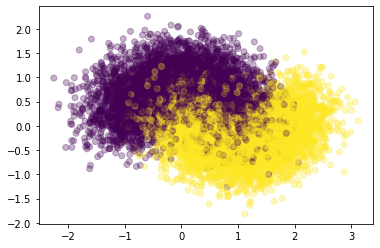

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker = 'o', alpha=0.3, c=y)
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [6]:
params = {
    'max_depth': [2, 3],
    'max_leaf_nodes': [2, 3, 4, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), params, cv=3)

In [7]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3], 'max_leaf_nodes': [2, 3, 4, 5]})

In [8]:
print('best parameters : ', grid_search.best_params_)
print('best score : ', grid_search.best_score_)

best parameters :  {'max_depth': 2, 'max_leaf_nodes': 4}
best score :  0.8477777777777779


In [9]:
best_tree = grid_search.best_estimator_

In [10]:
result = best_tree.predict(X_test)

In [11]:
accuracy_score(result, y_test)

0.852

## Grow more trees

In [12]:
subsets = ShuffleSplit(n_splits=1000, random_state=42, train_size=0.0111)

In [13]:
subsets

ShuffleSplit(n_splits=1000, random_state=42, test_size=None,
       train_size=0.0111)

In [14]:
len(X_train)

9000

In [15]:
# a. Generate 1,000 subsets of the training set, each containing 100 instances

forest = []

for idx in subsets.split(X_train):
    X_sub_train, y_sub_train = X_train[idx[0]], y_train[idx[0]]
    clf = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4)
    clf.fit(X_sub_train, y_sub_train)
    forest.append(clf)

In [16]:
forest[:5]

[DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4),
 DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4),
 DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4),
 DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4),
 DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4)]

In [17]:
# b. Train one Decision Tree on each subset

results = []

for tree in forest:
    result = tree.predict(X_test)
    acc = accuracy_score(result, y_test)
    results.append(acc)

In [18]:
pd.Series(results).describe()

count    1000.000000
mean        0.818875
std         0.031563
min         0.668000
25%         0.805000
50%         0.830000
75%         0.841250
max         0.854000
dtype: float64

In [19]:
# c. For each test set instance, generate the predictions and keep the most frequent prediction

predictions = []

for tree in forest:
    prediction = tree.predict(X_test)
    predictions.append(prediction)

In [20]:
from scipy.stats import mode

majority_vote = mode(predictions)[0][0]

In [21]:
# d. Evaluate

accuracy_score(majority_vote, y_test)

0.851

It performs worse than the individual classifier. I do not know why though.